In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
beta=10
def generate_dataset_simple(beta, n, std_dev):
    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.random_sample(n) * 100
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    return x.reshape(n,1),y


In [13]:
x, y = generate_dataset_simple(beta, 50, 100)

# Take the first 40 samples to train, and the last 10 to test
x_train = x[:-10]
y_train = y[:-10]

x_test = x[-10:]
y_test = y[-10:]

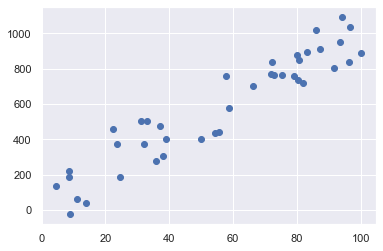

In [14]:
plt.scatter(x_train,y_train)
plt.show()

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

# Train the model using the training data that we created
model.fit(x_train, y_train)
# Now that we have trained the model, we can print the coefficient of x that it has predicted
print('Coefficient: \n', model.coef_)

# We then use the model to make predictions based on the test values of x
y_pred = model.predict(x_test)

# Now, we can calculate the models accuracy metrics based on what the actual value of y was
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))

Coefficient: 
 [9.51019356]
Mean squared error: 12435.19
r_2 statistic: 0.84


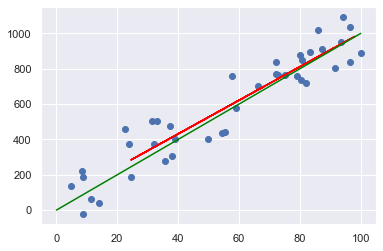

In [16]:
from matplotlib import pyplot as plt
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
x_actual = np.array([0, 100])
y_actual = x_actual*10
plt.plot(x_actual, y_actual, color='green')
plt.show()

# TUGAS 

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
import pandas as pd
df=pd.read_csv("diamonds.csv",index_col=None).iloc[:, 1:]
replaceval={"color":{"D": 7,"E": 6,"F": 5,"G": 4,"H": 3,"I": 2,"J": 1},
           "cut":{"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5},
            "clarity":{"FL":11,"IF":10, "VVS1":9, "VVS2":8, "VS1":7, "VS2":6, "SI1":5, "SI2":4, "I1":3, "I2":2, "I3":1}
           }
df.replace(replaceval, inplace=True)    

X=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']].values
y=df['price'].values

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
scores2= cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

r2_scores = []
MSE_scores = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    print(train_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_pred, y_test))
    MSE_scores.append(mean_squared_error(y_pred, y_test))

print("KFold R2:",r2_scores)
print("KFold MSE:",MSE_scores)
print("cross_val_score R2 : ",scores)
print("cross_val_score MSE : ",abs(scores2))



[10788 10789 10790 ... 53937 53938 53939]
[    0     1     2 ... 53937 53938 53939]
[    0     1     2 ... 53937 53938 53939]
[    0     1     2 ... 53937 53938 53939]
[    0     1     2 ... 43149 43150 43151]
KFold R2: [0.6381650821423953, 0.7336662359971651, 0.6643593564757022, 0.11506299915840401, 0.5218267622554247]
KFold MSE: [1083537.6094819817, 1879667.6186372596, 8518638.356332293, 981065.2050156273, 564916.5358650249]
cross_val_score R2 :  [  0.19596667   0.62136798   0.8064609  -18.44030485  -0.65787309]
cross_val_score MSE :  [1083537.60948198 1879667.61863726 8518638.35633229  981065.20501563
  564916.53586502]


Regresi linear adalah algoritma yang mencari hubungan/pola sebab akibat antara Variabel Faktor Penyebab (X) terhadap Variabel Akibatnya(Y).
